## Brain Cancer - CNN 

Brain cancer stands out as a major health problem worldwide. With its different types and degrees, it creates significant challenges in the field of medical diagnosis and treatment. Such tumors include classes such as "no tumor", "pituitary tumor", "meningioma tumor" and "glioma tumor". Brain tumors can be in both benign and malignant forms and can seriously affect the quality of life of patients. Early diagnosis is critical to the success of brain cancer treatment. Traditional methods require doctors to recognize brain tumors using imaging techniques; however, this process is time-consuming and requires expertise. In recent years, the development of machine learning and deep learning techniques has offered new opportunities to accelerate and automate diagnostic processes in this area.

Convolutional Neural Networks (CNN) are a powerful deep learning architecture known for its ability to analyze image data. CNNs achieve high success rates in object recognition and classification tasks by learning complex patterns and features in images. CNN models applied on brain cancer imaging data offer a promising approach to achieve automatic recognition and classification of brain tumors. This study aims to develop a CNN model for the recognition and classification of brain cancer images.

<img src='brain.jpg' width=550 >

<a href='https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri' target=_blank>You can find the data file here</a>

### Import Libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from IPython.display import Image
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import warnings
warnings.filterwarnings('ignore')

### Reading the pictures and labels

In [2]:
labels=['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']
img_path='Brain/'

In [3]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [4]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [5]:
df.head()

,img,label
0,Brain/no_tumor/1.jpg,no_tumor
1,Brain/no_tumor/2.jpg,no_tumor
2,Brain/no_tumor/3.jpg,no_tumor
3,Brain/no_tumor/4.jpg,no_tumor
4,Brain/no_tumor/5.jpg,no_tumor


### Label Encoding

In [6]:
d={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}

In [7]:
df['encode_label']=df['label'].map(d)

In [8]:
df.head()

,img,label,encode_label
0,Brain/no_tumor/1.jpg,no_tumor,0
1,Brain/no_tumor/2.jpg,no_tumor,0
2,Brain/no_tumor/3.jpg,no_tumor,0
3,Brain/no_tumor/4.jpg,no_tumor,0
4,Brain/no_tumor/5.jpg,no_tumor,0


In [45]:
df.sample(5)

,img,label,encode_label
2398,Brain/glioma_tumor/gg (153).jpg,glioma_tumor,3
2660,Brain/glioma_tumor/gg (39).jpg,glioma_tumor,3
2035,Brain/meningioma_tumor/m2 (48).jpg,meningioma_tumor,2
2698,Brain/glioma_tumor/gg (423).jpg,glioma_tumor,3
1819,Brain/meningioma_tumor/m1(195).jpg,meningioma_tumor,2


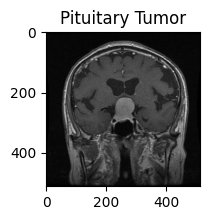

In [12]:
p='Brain/pituitary_tumor/p (37).jpg'
plt.figure(figsize=(2,2))
plt.imshow(plt.imread(p))
plt.title('Pituitary Tumor')
plt.show()

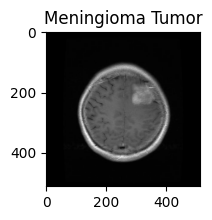

In [17]:
p='Brain/meningioma_tumor/m (177).jpg'
plt.figure(figsize=(2,2))
plt.imshow(plt.imread(p))
plt.title('Meningioma Tumor')
plt.show()

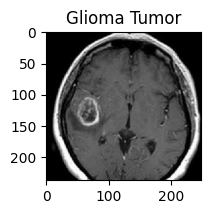

In [18]:
p='Brain/glioma_tumor/image(94).jpg'
plt.figure(figsize=(2,2))
plt.imshow(plt.imread(p))
plt.title('Glioma Tumor')
plt.show()

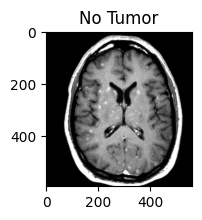

In [19]:
p='Brain/no_tumor/4.jpg'
plt.figure(figsize=(2,2))
plt.imshow(plt.imread(p))
plt.title('No Tumor')
plt.show()

In [16]:
x=[]
for img in df['img']:  
    img=cv2.imread(img) 
    img=cv2.resize(img,(32,32)) 
    img=img/255.0 
    x.append(img)

## Modelling

In [25]:
x=np.array(x)

In [26]:
y=df['encode_label']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [28]:
model=Sequential()
model.add(Input(shape=(32,32,3))) 
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(4,activation='softmax')) 
early_stopping=EarlyStopping(monitor='val_loss', patience=5, verbose=1)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=150,verbose=1, callbacks=[early_stopping])

Epoch 1/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.4544 - loss: 1.2076 - val_accuracy: 0.5942 - val_loss: 0.9648
Epoch 2/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6999 - loss: 0.7723 - val_accuracy: 0.7550 - val_loss: 0.6909
Epoch 3/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7769 - loss: 0.6078 - val_accuracy: 0.7075 - val_loss: 0.6980
Epoch 4/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8369 - loss: 0.4553 - val_accuracy: 0.7994 - val_loss: 0.5376
Epoch 5/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8865 - loss: 0.3277 - val_accuracy: 0.8560 - val_loss: 0.4875
Epoch 6/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9267 - loss: 0.2175 - val_accuracy: 0.8469 - val_loss: 0.4748
Epoch 7/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9582 - loss: 0.1581 - val_accuracy: 0.8668 - val_loss: 0.4600
Epoch 8/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9660 - loss: 0.1130 - val_accuracy: 0.

In [31]:
loss,accuracy=model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8976 - loss: 0.4997
Test Loss: 0.506726861000061
Test Accuracy: 0.8790199160575867


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 944,846 (3.60 MB)

 Trainable params: 314,948 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 629,898 (2.40 MB)

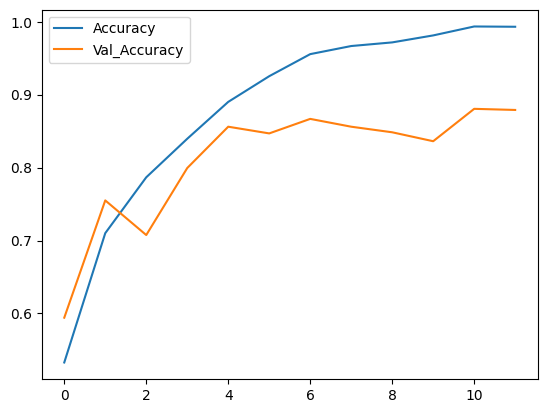

In [33]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

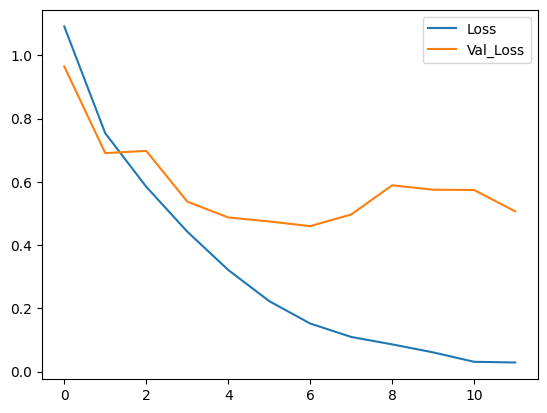

In [34]:
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Val_Loss')
plt.legend();

In [35]:
pred=model.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
confusion_matrix(y_test,np.argmax(pred,axis=1))

array([[104,   3,  10,   7],
       [  2, 177,   3,   3],
       [  6,   1, 143,  15],
       [  4,   1,  24, 150]], dtype=int64)

In [38]:
print(classification_report(y_test, np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       124
           1       0.97      0.96      0.96       185
           2       0.79      0.87      0.83       165
           3       0.86      0.84      0.85       179

    accuracy                           0.88       653
   macro avg       0.88      0.88      0.88       653
weighted avg       0.88      0.88      0.88       653



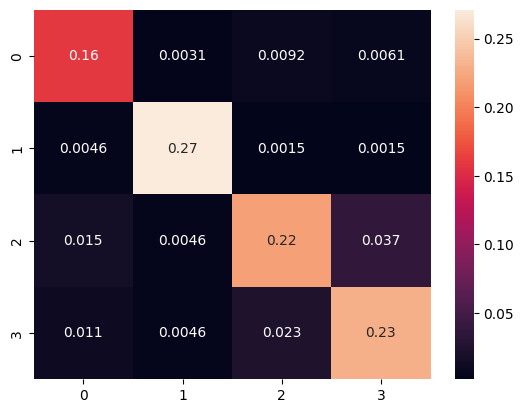

In [39]:
cm = confusion_matrix(np.argmax(pred,axis=1), y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True);

In [40]:
model.save('brain_model.h5')
#We save our model.

## Transfer Learning

In [41]:
data_dir='Brain'
img_width,img_height=32,32
train_datagen=ImageDataGenerator(rescale=1/255,validation_split=.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode='categorical', subset='training')

test_datagen=ImageDataGenerator(rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode='categorical', subset='validation')

base_model=VGG16(weights='imagenet', input_shape=(img_width,img_height,3),include_top=False)

model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False  
    
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=25,validation_data=test_datagenerator)

Found 2612 images belonging to 4 classes.
Found 652 images belonging to 4 classes.
Epoch 1/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 63s 727ms/step - accuracy: 0.5242 - loss: 1.0847 - val_accuracy: 0.4724 - val_loss: 1.3155
Epoch 2/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 59s 709ms/step - accuracy: 0.6811 - loss: 0.7615 - val_accuracy: 0.5598 - val_loss: 1.1292
Epoch 3/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 55s 650ms/step - accuracy: 0.7520 - loss: 0.6324 - val_accuracy: 0.5123 - val_loss: 1.1897
Epoch 4/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 57s 679ms/step - accuracy: 0.7501 - loss: 0.6339 - val_accuracy: 0.5353 - val_loss: 1.2276
Epoch 5/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 62s 734ms/step - accuracy: 0.7593 - loss: 0.5773 - val_accuracy: 0.5583 - val_loss: 1.1967
Epoch 6/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 61s 724ms/step - accuracy: 0.7883 - loss: 0.5240 - val_accuracy: 0.5123 - val_loss: 1.3077
Epoch 7/25
82/82 ━━━━━━━━━━━━━━━━━━━━ 54s 639ms/step - accuracy: 0.7907 - loss: 0.5094 - val_accuracy: 0.5936 - val_loss: 1.1674
Epoch 8/25
82/

In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,302,926 (62.19 MB)

 Trainable params: 529,412 (2.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,058,826 (4.04 MB)

In [43]:
test_loss, test_acc=model.evaluate(test_datagenerator, verbose=2)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

21/21 - 5s - 227ms/step - accuracy: 0.6242 - loss: 1.3821
Test Loss: 1.3820586204528809
Test Accuracy: 0.6242331266403198


In [44]:
model.save('brain.keras')

### Predict the Images

In [61]:
img=image.load_img('Brain/meningioma_tumor/m1(195).jpg', target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)

In [62]:
model=VGG16(weights='imagenet')

In [63]:
pred=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step


In [64]:
decode_predictions(pred, top=1)

[[('n01930112', 'nematode', 0.9942883)]]

### Summary

In this study, a Convolutional Neural Network (CNN) model was developed for automatic classification of brain cancer images. The model was trained using a dataset representing brain tumors. During the training process, data augmentation techniques, optimization algorithms, and hyperparameter adjustments were applied to increase the overall accuracy of the model. The results show that the model can classify 87 percent of brain cancer images. Our success rate in transfer learning is around 62-64 percent.